<a href="https://colab.research.google.com/github/muthonioprah/Football-Match-Prediction-Results/blob/main/Moringa_Data_Science_Core_W6_Independent_Project_2022_2_Oprah_Muthoni_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team Rank of away team Tournament type Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

#**Research Question**

Predict how many goals the home team scores.

Predict how many goals the away team scores.

Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

#**Defining the metric for success**

A models that successfully predicts how many goals the home team scores, how many goals the away team scores and determine from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

# **Data Understanding**

In [2]:
#importing the relevant libraries
import pandas as pd
import numpy as np

In [3]:
#reading the csv documents
ranking = pd.read_csv('/content/fifa_ranking.csv')
results = pd.read_csv('/content/results.csv')

In [4]:
#studying the datasets
#we start with the ranking datset
print(ranking.shape)
print("****************************************************************************")
ranking.head()

(57793, 16)
****************************************************************************


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
#viewing the results datset
print(results.shape)
print("****************************************************************************")
results.head()

(40839, 9)
****************************************************************************


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
#displaying the dataset information
ranking.info() 
print("****************************************************************************")
print(results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [7]:
#showing the descriptive statisics for this first dataset
ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [8]:
#descriptive statistics
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [9]:
#finding the null values
print(ranking.isnull().any())
print("***********************************************")
print(results.isnull().any())

rank                       False
country_full               False
country_abrv               False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
rank_date                  False
dtype: bool
***********************************************
date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool


Both datasets have no null values

In [10]:
#checking for duplicate values
print("Sum of duplicated records in the ranking datset is " + str(ranking.duplicated().sum()))
print("Sum of duplicated records in the results datset is " + str(results.duplicated().sum()))

Sum of duplicated records in the ranking datset is 37
Sum of duplicated records in the results datset is 0




> The results dataset has no duplicate values









In [11]:
#viewing the exact duplicated records in the ranking dataset
dup_rank = ranking[ranking.duplicated()]
dup_rank

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
41320,113,Sudan,SDN,297.13,304,-1,126.55,126.55,219.72,109.86,67.36,20.21,202.53,40.51,CAF,2011-12-21
41536,120,Sudan,SDN,264.81,297,-7,129.14,129.14,163.12,81.56,40.91,12.27,209.21,41.84,CAF,2012-01-18
41736,111,Sudan,SDN,301.67,265,9,156.34,156.34,163.12,81.56,40.91,12.27,257.48,51.50,CAF,2012-02-15
41944,110,Sudan,SDN,299.75,302,1,156.34,156.34,163.12,81.56,46.75,14.03,239.09,47.82,CAF,2012-03-07
42157,113,Sudan,SDN,292.03,300,-3,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-04-11
42366,113,Sudan,SDN,292.03,292,0,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-05-09
42562,101,Sudan,SDN,338.25,292,12,179.70,179.70,209.32,104.66,7.08,2.12,258.83,51.77,CAF,2012-06-06
42775,105,Sudan,SDN,329.36,338,-4,171.57,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,2012-07-04
42983,104,Sudan,SDN,329.36,329,1,171.57,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,2012-08-08
43193,103,Sudan,SDN,331.79,329,1,169.05,169.05,187.77,93.88,108.13,32.44,182.11,36.42,CAF,2012-09-05


## **Data Cleaning**

In [12]:
#dropping the columns thatwont be usedin this analysis
colz = ['country_abrv', 'total_points','previous_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg','three_year_ago_weighted', 'confederation']

ranking_colz = ranking.drop(columns=colz)
ranking_colz.head()

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


In [13]:
#checking the shape of the new dataframe
ranking_colz.shape

(57793, 3)

In [21]:
#changing the column with the datesto datetime format
anking_colz['rank_date'] = pd.to_datetime(ranking_colz['rank_date'], format='%Y-%m-%d')
ranking_colz.dtypes

rank                     int64
country_full            object
rank_date       datetime64[ns]
year                     int64
dtype: object

In [20]:
#changing the column with the datesto datetime format
results['date'] = pd.to_datetime(results['date'], format='%Y-%m-%d')
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [17]:
#the two datasets have the date column in common s the will be merged on that axis
#we first extract the year from the date time column
ranking_colz['year'] = ranking_colz['rank_date'].dt.year
ranking_colz.head()

,rank,country_full,rank_date,year
0,1,Germany,1993-08-08,1993
1,2,Italy,1993-08-08,1993
2,3,Switzerland,1993-08-08,1993
3,4,Sweden,1993-08-08,1993
4,5,Argentina,1993-08-08,1993


In [22]:
#do the same for the results dataframe
results['year'] = results['date'].dt.year
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,2019
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,2019
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,2019
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,2019
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True,2019


In [39]:
#rename columns in the ranking table for uniformity
ranking_colz.rename(columns = {'country_full' : 'country'}, inplace = True)

In [40]:
#merging the 2 datasets based on year and home team
df = pd.merge(results,ranking_colz, left_on=['home_team', 'year'], right_on=['home_team', 'year'], how='inner')
df.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,rank,rank_date
0,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,48,1993-08-08
1,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,42,1993-09-23
2,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,40,1993-10-22
3,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,41,1993-11-19
4,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,37,1993-12-23


In [41]:
# Then with the away teams' ranking

df1 = pd.merge(results,ranking_colz, left_on=['away_team', 'year'], right_on=['home_team', 'year'], how='inner')
df1.head(5)

,date,home_team_x,away_team,home_score,away_score,tournament,city,country,neutral,year,rank,home_team_y,rank_date
0,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,74,Mali,1993-08-08
1,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,70,Mali,1993-09-23
2,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,73,Mali,1993-10-22
3,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,75,Mali,1993-11-19
4,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,70,Mali,1993-12-23


In [45]:
#to merge both home and away
merged = pd.merge(df, df1, how='inner', left_on=['date','home_team', 'away_team','home_score','away_score'], right_on=['date','country','away_team', 
                                                  'home_score', 'away_score']) 
merged.head()

,date,home_team,away_team,home_score,away_score,tournament_x,city_x,country_x,neutral_x,year_x,rank_x,rank_date_x,home_team_x,tournament_y,city_y,country_y,neutral_y,year_y,rank_y,home_team_y,rank_date_y
0,1993-01-23,Ghana,Niger,4,0,Friendly,Kumasi,Ghana,False,1993,48,1993-08-08,Ghana,Friendly,Kumasi,Ghana,False,1993,77,Niger,1993-08-08
1,1993-01-23,Ghana,Niger,4,0,Friendly,Kumasi,Ghana,False,1993,48,1993-08-08,Ghana,Friendly,Kumasi,Ghana,False,1993,82,Niger,1993-09-23
2,1993-01-23,Ghana,Niger,4,0,Friendly,Kumasi,Ghana,False,1993,48,1993-08-08,Ghana,Friendly,Kumasi,Ghana,False,1993,82,Niger,1993-10-22
3,1993-01-23,Ghana,Niger,4,0,Friendly,Kumasi,Ghana,False,1993,48,1993-08-08,Ghana,Friendly,Kumasi,Ghana,False,1993,81,Niger,1993-11-19
4,1993-01-23,Ghana,Niger,4,0,Friendly,Kumasi,Ghana,False,1993,48,1993-08-08,Ghana,Friendly,Kumasi,Ghana,False,1993,81,Niger,1993-12-23


In [47]:
# Checking the shape of the fully merged dataframe.
merged.shape

(1770446, 21)

In [49]:
#checing for duplicated records
erged.duplicated().sum()

2976

In [50]:
#dropping duplicated records
merged.drop_duplicates(keep= 'first', inplace= True)
merged.shape

(1767470, 21)

In [51]:
#check for null records
merged.isnull().sum()

date            0
home_team       0
away_team       0
home_score      0
away_score      0
tournament_x    0
city_x          0
country_x       0
neutral_x       0
year_x          0
rank_x          0
rank_date_x     0
home_team_x     0
tournament_y    0
city_y          0
country_y       0
neutral_y       0
year_y          0
rank_y          0
home_team_y     0
rank_date_y     0
dtype: int64

There are no null records

In [56]:
#dropping the similar columns from merged dataset
dff = merged.drop(columns=['rank_date_x', 'year_x'])

dff.rename(columns={'rank_x':'home_team_rank', 'rank_y':'away_team_rank'},inplace=True)
dff.head(3)

,date,home_team,away_team,home_score,away_score,tournament_x,city_x,country_x,neutral_x,home_team_rank,home_team_x,tournament_y,city_y,country_y,neutral_y,year_y,away_team_rank,home_team_y,rank_date_y
0,1993-01-23,Ghana,Niger,4,0,Friendly,Kumasi,Ghana,False,48,Ghana,Friendly,Kumasi,Ghana,False,1993,77,Niger,1993-08-08
1,1993-01-23,Ghana,Niger,4,0,Friendly,Kumasi,Ghana,False,48,Ghana,Friendly,Kumasi,Ghana,False,1993,82,Niger,1993-09-23
2,1993-01-23,Ghana,Niger,4,0,Friendly,Kumasi,Ghana,False,48,Ghana,Friendly,Kumasi,Ghana,False,1993,82,Niger,1993-10-22


In [68]:
# using a function to create the status column based on Home team
def my_function(x):
    if x['home_score'] == x['away_score']:
        status = 'Draw'
    elif x['home_score'] > x['away_score']:
        status = 'Win'
    else:
        status = 'loss'
    return status

dff['score'] = dff.apply(my_function, axis=1)

# **Univariate Analysis**

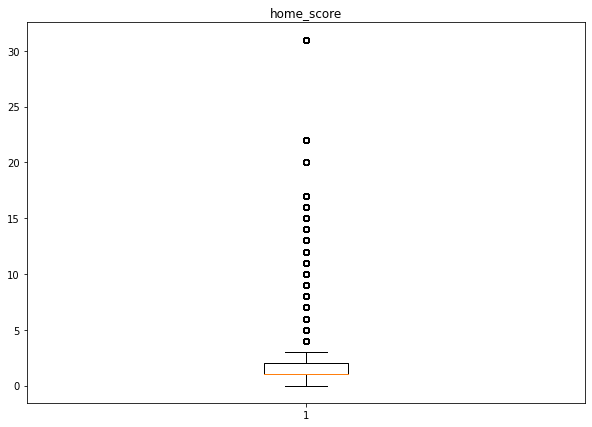

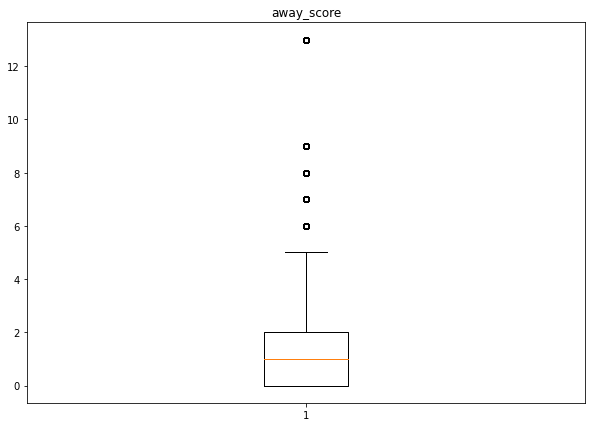

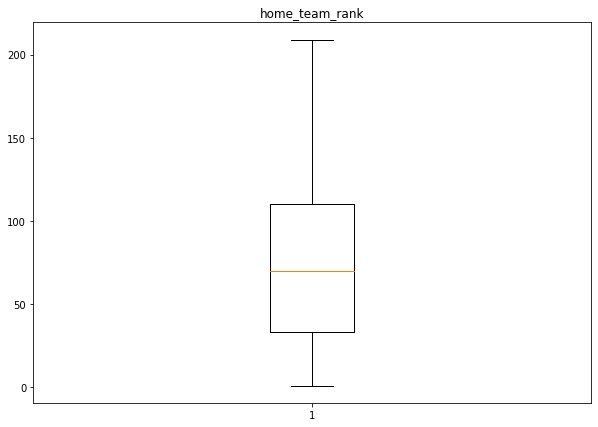

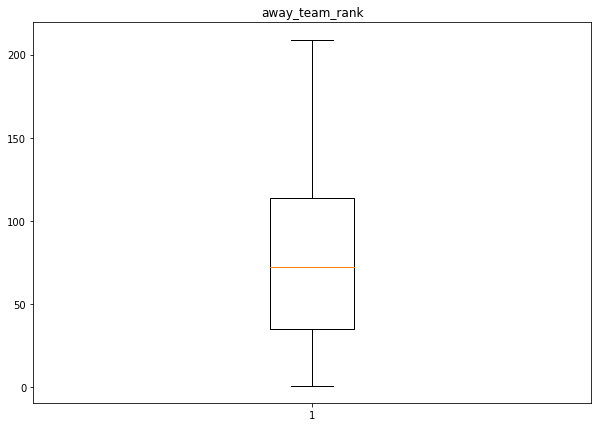

In [60]:
# We will check for outliers in our numerical columns
import matplotlib.pyplot as plt
col= ['home_score', 'away_score','home_team_rank', 'away_team_rank']
for i in col:
  fig = plt.figure(figsize = (10,7))
  plt.boxplot(dff[i])
  plt.title(i)
  plt.show()

In [62]:
# Frequency Table on distribution of tournaments
dff.tournament_x.value_counts().head()

Friendly                                709099
FIFA World Cup qualification            524073
UEFA Euro qualification                 181776
African Cup of Nations qualification    118481
AFC Asian Cup qualification              41876
Name: tournament_x, dtype: int64

<Figure size 1000x300 with 0 Axes>

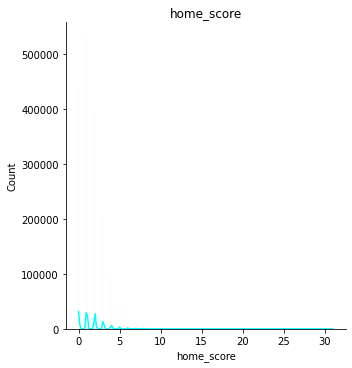

<Figure size 1000x300 with 0 Axes>

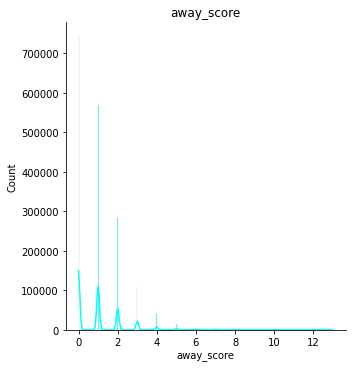

<Figure size 1000x300 with 0 Axes>

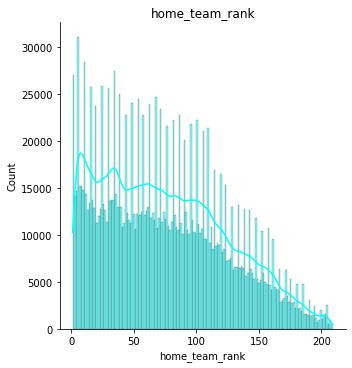

<Figure size 1000x300 with 0 Axes>

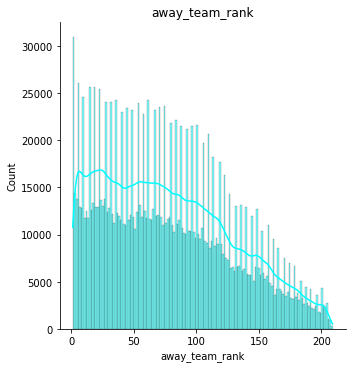

In [89]:
# Histograms of our numerical values
import seaborn as sns
for i in col:
  plt.figure(figsize = (10,3), dpi=100)
  sns.displot(dff[i], kde = True, color = 'aqua')
  plt.title(i, color = 'Black')
  plt.show()

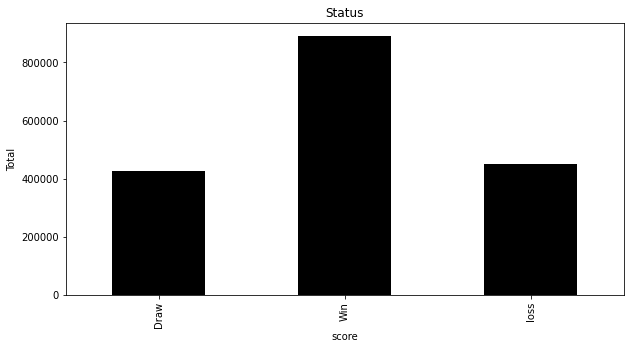

In [69]:
# Bar chart on Status
plt.figure(figsize = (10,5))
dff.groupby('score').size().plot(kind='bar', color='black')
plt.title('Status')
plt.ylabel('Total')
plt.xlabel('score')
plt.show()


In [70]:
# Checking the descriptive statistics
dff.describe()

,home_score,away_score,home_team_rank,year_y,away_team_rank
count,1.767470e+06,1.767470e+06,1.767470e+06,1.767470e+06,1.767470e+06
mean,1.650301e+00,9.961878e-01,7.528656e+01,2.006584e+03,7.811764e+01
std,1.628531e+00,1.161184e+00,4.946705e+01,6.629088e+00,5.120399e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.993000e+03,1.000000e+00
25%,1.000000e+00,0.000000e+00,3.300000e+01,2.001000e+03,3.500000e+01
50%,1.000000e+00,1.000000e+00,7.000000e+01,2.007000e+03,7.200000e+01
75%,2.000000e+00,2.000000e+00,1.100000e+02,2.012000e+03,1.140000e+02
max,3.100000e+01,1.300000e+01,2.090000e+02,2.018000e+03,2.090000e+02


# **Bivariate Aalysis**

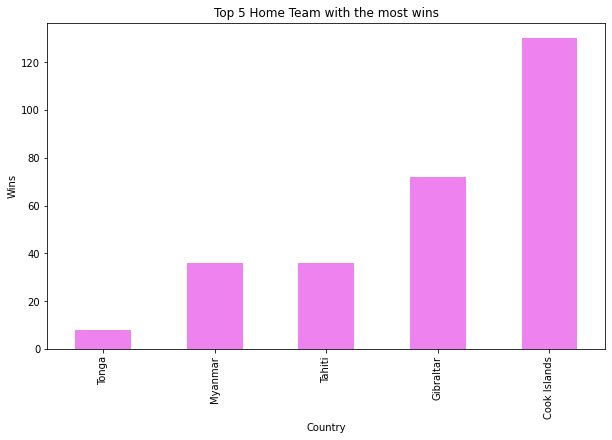

In [82]:
# Home teams with the most wins
win= dff[(dff['score']== 'Win')]
win1 = win.groupby(['home_team'])['score'].size().sort_values(ascending=True).head()
win1.plot(kind = 'bar', title= 'Top 5 Home Team with the most wins', ylabel = 'Wins' , xlabel = 'Country' , figsize =(10,6) , color = 'violet')
plt.show()

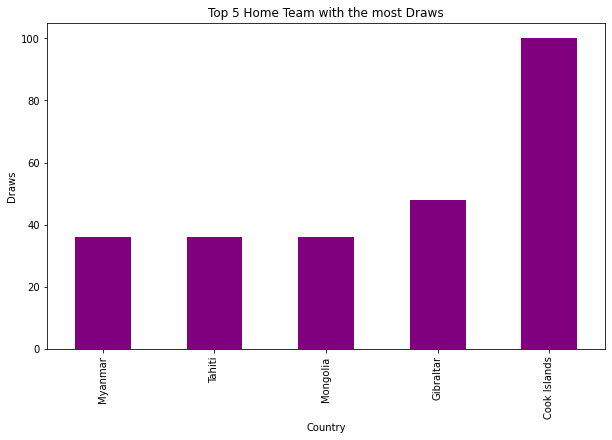

In [81]:
# Home teams with the most draws
draws= dff[(dff['score']== 'Draw')]
draw1 = draws.groupby(['home_team'])['score'].size().sort_values(ascending= True).head()
draw1.plot(kind = 'bar', title= 'Top 5 Home Team with the most Draws', ylabel = 'Draws' , xlabel = 'Country' , figsize =(10,6) , color = 'purple')
plt.show()

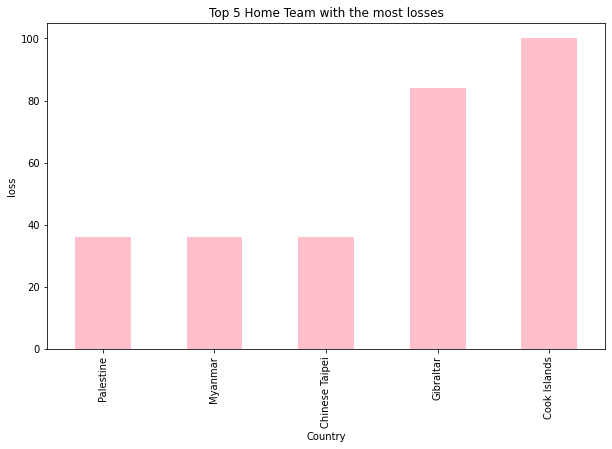

In [80]:
# Home teams with the most lossess
loss =dff[(dff['score']== 'loss')]
loss1 = loss.groupby(['home_team'])['score'].size().sort_values(ascending= True).head()
loss1.plot(kind = 'bar', title= 'Top 5 Home Team with the most losses', ylabel = 'loss' , xlabel = 'Country' , figsize =(10,6) , color = 'pink')
plt.show()

In [84]:
 #Most Played Tournament

tournament= dff['tournament_x'].value_counts()
print(tournament)

Friendly                                709099
FIFA World Cup qualification            524073
UEFA Euro qualification                 181776
African Cup of Nations qualification    118481
AFC Asian Cup qualification              41876
                                         ...  
OSN Cup                                    288
Lunar New Year Cup                         265
Copa América qualification                 144
Millennium Cup                             144
Intercontinental Cup                       144
Name: tournament_x, Length: 62, dtype: int64


# **Multivariate Analysis**

In [85]:
# Asses correlation between our variables 
dff.corr()

,home_score,away_score,neutral_x,home_team_rank,neutral_y,year_y,away_team_rank
home_score,1.000000,-0.163949,NaN,-0.171654,NaN,-0.029358,0.340025
away_score,-0.163949,1.000000,NaN,0.208024,NaN,-0.003176,-0.236502
neutral_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_team_rank,-0.171654,0.208024,NaN,1.000000,NaN,0.111965,0.390466
neutral_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_y,-0.029358,-0.003176,NaN,0.111965,NaN,1.000000,0.111899
away_team_rank,0.340025,-0.236502,NaN,0.390466,NaN,0.111899,1.000000


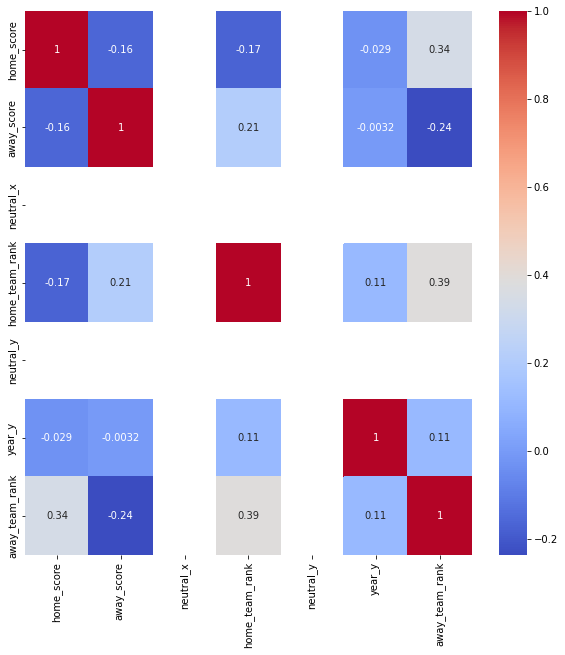

In [86]:
# Plot a heatmap
fig, heat = plt.subplots(figsize = (10,10))
heat = sns.heatmap(dff.corr(), annot = True, cmap = 'coolwarm')

<Figure size 700x500 with 0 Axes>

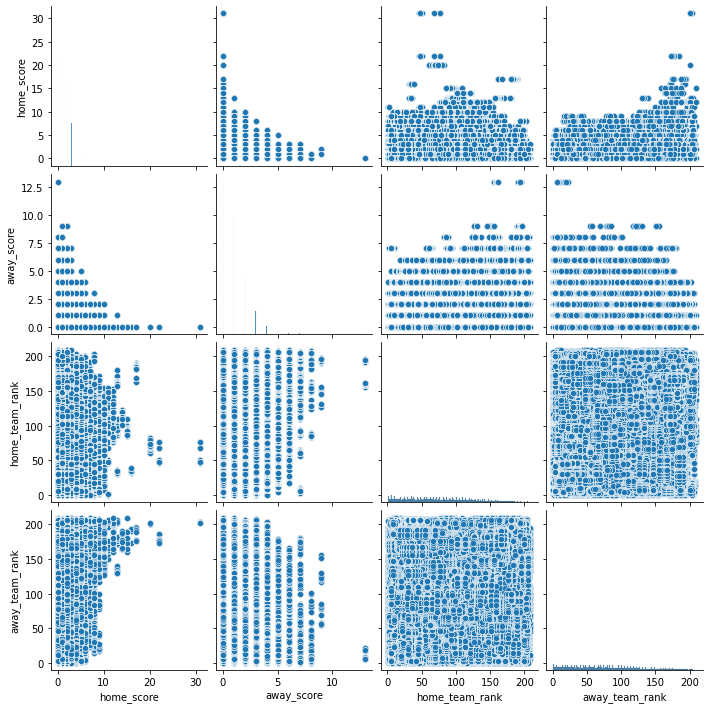

In [88]:
# Plotting a pairplot of all the numerical values
plt.figure(figsize = (7, 5), dpi=100)
sns.pairplot(dff[col])

In [99]:
# Predict the number of goals scored by the away team having away_score as the dependent variable
# We'll drop columns that are irrelevant in predicting the goals scored by away team

independent = dff.drop(columns=['date', 'home_team', 'away_team', 'away_score', 'tournament_x'])
corr = independent.corr()
corr

,home_score,neutral_x,home_team_rank,neutral_y,year_y,away_team_rank
home_score,1.000000,NaN,-0.171654,NaN,-0.029358,0.340025
neutral_x,NaN,NaN,NaN,NaN,NaN,NaN
home_team_rank,-0.171654,NaN,1.000000,NaN,0.111965,0.390466
neutral_y,NaN,NaN,NaN,NaN,NaN,NaN
year_y,-0.029358,NaN,0.111965,NaN,1.000000,0.111899
away_team_rank,0.340025,NaN,0.390466,NaN,0.111899,1.000000


In [100]:
# Import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# **Logistic regression**

In [135]:
#Applying label encoding to our dataset
from sklearn.preprocessing import LabelEncoder
dff1= dff.apply(LabelEncoder().fit_transform)
dff1.head()

,date,home_team,away_team,home_score,away_score,tournament_x,city_x,country_x,neutral_x,home_team_rank,home_team_x,tournament_y,city_y,country_y,neutral_y,year_y,away_team_rank,home_team_y,rank_date_y,status,score
0,8,70,129,4,0,26,495,70,0,47,70,26,495,70,0,0,76,129,0,1,1
1,8,70,129,4,0,26,495,70,0,47,70,26,495,70,0,0,81,129,1,1,1
2,8,70,129,4,0,26,495,70,0,47,70,26,495,70,0,0,81,129,2,1,1
3,8,70,129,4,0,26,495,70,0,47,70,26,495,70,0,0,80,129,3,1,1
4,8,70,129,4,0,26,495,70,0,47,70,26,495,70,0,0,80,129,4,1,1


In [124]:
X = dff1.drop(['home_score', 'away_score'], axis = 1)
y = dff1['home_score']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [130]:
# Using our model to make a prediction
from sklearn.linear_model import LinearRegression, LogisticRegression
model = LogisticRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [131]:
#comparing the values from the dataset to those predicted
predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predict

,Actual,Predicted
511102,2,1
479443,1,2
1344936,0,0
1076073,3,2
1021635,0,0
...,...,...
640471,1,1
983490,0,0
1542893,1,1
1142609,1,1


In [134]:
#checking the model score
model.score(X_test, y_test)

0.33991524608621365

# **Using Cross Validation**

In [139]:
# dependent variable as y
from sklearn.model_selection import KFold, LeaveOneOut
X = dff1.drop(['home_score', 'away_score'], axis = 1).values
y = dff1['home_score'].values

# specifying the number of folds

folds = KFold(n_splits = 5)


# We now assess  models based on the folds we created.

RMSES = [] # An array of RMSEs to keep track of the RSME of each model
count = 1   # starting point # helps to keep track of the model number in training
  

In [140]:
for train_index, test_index in folds.split(X):
    print('\nTraining model ' + str(count))
# Setting up the train and test based on the split determined by KFold
  # With 10 folds we split our data into training and test sets
  
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]
  
  # fitting a Logistic regression model
logreg = LogisticRegression()  
logreg=logreg.fit(X_train, y_train)
  


Training model 1

Training model 1

Training model 1

Training model 1

Training model 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [142]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

  # Assess the accuracy of the model
y_pred = logreg.predict(X_test)
  
  # Calculating the RMSES of each model
  # Appending each RMSE into the list earlier created
rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSES.append(rmse_value)
  
 # printing each model RMSE
print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
count = count + 1

Model 1 Root Mean Squared Error: 1.5145123175701611


In [143]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
353489,2,1
353490,2,1
353491,2,1
353492,2,1


In [144]:
#checking the model score
logreg.score(X_test, y_test)

0.3469733573978625

# **Challenging the solution**
A more accurate model can be used to predict the outcome

# **Reviewing the Solution**

Follow up questions

a). Did we have the right data?
Yes, the data we had enabled us to create a strong model.

b). Do we need other data to answer our question?
No more data is needed to answer our question.

c). Did we have the right question?
Yes, the question we had allowed us to create the relevant model.